In [70]:
!pip install bs4 requests pandas

In [71]:
import requests
from bs4 import BeautifulSoup
for i in range(1):
  url = "https://www.metacritic.com/movie/moonlight-2016/user-reviews?page=" + str(i)
  headers = {'User-Agent': 'Mozilla/5.0'}
  html = requests.get(url,headers=headers)
  soup = BeautifulSoup(html.text, "html.parser") ##가져온 html 파일을 html parser를 통해서 정리
  


  review_list = list()
  html_review_list = soup.findAll("div", attrs={"class":"review_body"})
  for line in html_review_list:
    text = line.get_text()
    review_list.append(text)

  score_list = list()
  p_data = soup.find_all("div",attrs={"indiv"})
  for line in p_data:
    text = line.get_text()
    score_list.append(text)

In [72]:
score_list

['5',
 '0',
 '3',
 '3',
 '3',
 '10',
 '8',
 '0',
 '1',
 '9',
 '2',
 '0',
 '10',
 '7',
 '7',
 '1',
 '6',
 '5',
 '4',
 '5',
 '0',
 '6',
 '8',
 '4',
 '4',
 '5',
 '6',
 '3',
 '6',
 '5',
 '7',
 '6',
 '1',
 '8',
 '4',
 '8',
 '10',
 '10',
 '7',
 '7',
 '6',
 '10',
 '6',
 '2',
 '1',
 '3',
 '2',
 '1',
 '0',
 '8',
 '0',
 '0',
 '6',
 '3',
 '3',
 '10',
 '7',
 '8',
 '0',
 '0',
 '8',
 '10',
 '0',
 '0',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '9',
 '10',
 '10',
 '4',
 '0',
 '10',
 '4',
 '6',
 '10',
 '9',
 '9',
 '10',
 '10',
 '0',
 '9',
 '10',
 '10',
 '10',
 '9',
 '10',
 '10',
 '10',
 '9',
 '9',
 '9',
 '10',
 '10',
 '9',
 '9',
 '9']

In [73]:
review_list

['\nThere is, somehow, an interesting story here, as well as some good acting.  There are also some good scenes (particularly those involving his "adopted" father).  However, the cinematography and direction bear resemblance to the average homeThere is, somehow, an interesting story here, as well as some good acting.  There are also some good scenes (particularly those involving his "adopted" father).  However, the cinematography and direction bear resemblance to the average home movie.  There is also a huge gap in the story between an incident that happens in high school and Chiron as an adult.  What passions does Chiron have other than the fact that he is gay?  What does he even do for a living as an adult?  Most of these characters are stereotypes rather than well-drawn human beings.… Expand\n',
 "\nwhat a terribly boring film.  I'm sorry but this is absolutely not deserving of best picture and will be forgotten quickly.  Politically relevant?  Yes.  Entertaining and engaging cinema

In [74]:
preprocess_review = list()
for review_text in review_list:
  review_text = review_text.replace("\n", "")
 

  review_text = review_text.strip()
  preprocess_review.append(review_text)

In [75]:
preprocess_review

['There is, somehow, an interesting story here, as well as some good acting.  There are also some good scenes (particularly those involving his "adopted" father).  However, the cinematography and direction bear resemblance to the average homeThere is, somehow, an interesting story here, as well as some good acting.  There are also some good scenes (particularly those involving his "adopted" father).  However, the cinematography and direction bear resemblance to the average home movie.  There is also a huge gap in the story between an incident that happens in high school and Chiron as an adult.  What passions does Chiron have other than the fact that he is gay?  What does he even do for a living as an adult?  Most of these characters are stereotypes rather than well-drawn human beings.… Expand',
 "what a terribly boring film.  I'm sorry but this is absolutely not deserving of best picture and will be forgotten quickly.  Politically relevant?  Yes.  Entertaining and engaging cinema?  No.

In [76]:
result_list = list()
for review, score in zip(preprocess_review, score_list):
  row_data = [review, score]
  result_list.append(row_data)

In [77]:
##데이터셋 불러오기
import pandas as pd

review_df = pd.DataFrame(result_list, columns =['score', 'review'])
review_df

,score,review
0,"There is, somehow, an interesting story here, ...",5
1,what a terribly boring film. I'm sorry but th...,0
2,As far as Academy Award affirmative action han...,3
3,"For me, it was realistic and well acted, but l...",3
4,A gay movie for people who don't want to be bo...,3
...,...,...
95,Just a beautiful film. There's not a ton of ac...,10
96,One of the most sincere and honest films of th...,10
97,A singular and personal vision. An expression ...,9
98,"Such a beautifully made movie. The acting, the...",9


In [78]:
result_list

[['There is, somehow, an interesting story here, as well as some good acting.  There are also some good scenes (particularly those involving his "adopted" father).  However, the cinematography and direction bear resemblance to the average homeThere is, somehow, an interesting story here, as well as some good acting.  There are also some good scenes (particularly those involving his "adopted" father).  However, the cinematography and direction bear resemblance to the average home movie.  There is also a huge gap in the story between an incident that happens in high school and Chiron as an adult.  What passions does Chiron have other than the fact that he is gay?  What does he even do for a living as an adult?  Most of these characters are stereotypes rather than well-drawn human beings.… Expand',
  '5'],
 ["what a terribly boring film.  I'm sorry but this is absolutely not deserving of best picture and will be forgotten quickly.  Politically relevant?  Yes.  Entertaining and engaging ci

In [79]:
word_list = ''.join(preprocess_review).split(' ')

In [80]:
word_list

['There',
 'is,',
 'somehow,',
 'an',
 'interesting',
 'story',
 'here,',
 'as',
 'well',
 'as',
 'some',
 'good',
 'acting.',
 '',
 'There',
 'are',
 'also',
 'some',
 'good',
 'scenes',
 '(particularly',
 'those',
 'involving',
 'his',
 '"adopted"',
 'father).',
 '',
 'However,',
 'the',
 'cinematography',
 'and',
 'direction',
 'bear',
 'resemblance',
 'to',
 'the',
 'average',
 'homeThere',
 'is,',
 'somehow,',
 'an',
 'interesting',
 'story',
 'here,',
 'as',
 'well',
 'as',
 'some',
 'good',
 'acting.',
 '',
 'There',
 'are',
 'also',
 'some',
 'good',
 'scenes',
 '(particularly',
 'those',
 'involving',
 'his',
 '"adopted"',
 'father).',
 '',
 'However,',
 'the',
 'cinematography',
 'and',
 'direction',
 'bear',
 'resemblance',
 'to',
 'the',
 'average',
 'home',
 'movie.',
 '',
 'There',
 'is',
 'also',
 'a',
 'huge',
 'gap',
 'in',
 'the',
 'story',
 'between',
 'an',
 'incident',
 'that',
 'happens',
 'in',
 'high',
 'school',
 'and',
 'Chiron',
 'as',
 'an',
 'adult.',
 '',


In [81]:
def clean_wordlist(input_list):
    output_list = []
    for word in input_list:
        symbols = """!@#$%^&*()_-+={[}]|\;:"‘'·<>?/., """
        for i in range(len((symbols))):
            word = word.replace(symbols[i], '')      
        if len(word) > 0:
            output_list.append(word)
    return output_list

In [82]:
clean_list = clean_wordlist(word_list)

In [83]:
clean_list_lower = []
for i in clean_list:
  clean_list_lower.append(i.lower())

In [84]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
for word in clean_list_lower: 
  if word in stopwords.words('english'): 
    clean_list_lower.remove(word) 

clean_list_lower.remove('movie')
clean_list_lower

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['somehow',
 'interesting',
 'story',
 'well',
 'good',
 'acting',
 'also',
 'good',
 'scenes',
 'particularly',
 'involving',
 'adopted',
 'father',
 'however',
 'cinematography',
 'direction',
 'bear',
 'resemblance',
 'average',
 'homethere',
 'somehow',
 'interesting',
 'story',
 'well',
 'good',
 'acting',
 'also',
 'good',
 'scenes',
 'particularly',
 'involving',
 'adopted',
 'father',
 'however',
 'cinematography',
 'direction',
 'bear',
 'resemblance',
 'average',
 'home',
 'also',
 'huge',
 'gap',
 'story',
 'incident',
 'happens',
 'high',
 'school',
 'chiron',
 'adult',
 'passions',
 'chiron',
 'fact',
 'gay',
 'even',
 'living',
 'adult',
 'characters',
 'stereotypes',
 'rather',
 'welldrawn',
 'human',
 'beings…',
 'expandwhat',
 'terribly',
 'boring',
 'film',
 'im',
 'sorry',
 'absolutely',
 'deserving',
 'best',
 'picture',
 'forgotten',
 'quickly',
 'politically',
 'relevant',
 'yes',
 'entertaining',
 'engaging',
 'cinema',
 'nothing',
 'performances',
 'flat',
 'fac

In [85]:
def counter(input_list):
    word_count = {}
    for word in clean_list_lower:
        if word in  word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count
    
word_count = counter(clean_list_lower)
word_count

{'somehow': 4,
 'interesting': 14,
 'story': 61,
 'well': 21,
 'good': 40,
 'acting': 19,
 'also': 17,
 'scenes': 11,
 'particularly': 6,
 'involving': 3,
 'adopted': 2,
 'father': 7,
 'however': 10,
 'cinematography': 18,
 'direction': 7,
 'bear': 2,
 'resemblance': 2,
 'average': 6,
 'homethere': 1,
 'home': 5,
 'huge': 3,
 'gap': 1,
 'incident': 1,
 'happens': 1,
 'high': 9,
 'school': 5,
 'chiron': 40,
 'adult': 10,
 'passions': 1,
 'fact': 8,
 'gay': 36,
 'even': 13,
 'living': 2,
 'characters': 32,
 'stereotypes': 3,
 'rather': 5,
 'welldrawn': 1,
 'human': 4,
 'beings…': 1,
 'expandwhat': 1,
 'terribly': 2,
 'boring': 18,
 'film': 128,
 'im': 10,
 'sorry': 5,
 'absolutely': 4,
 'deserving': 6,
 'best': 54,
 'picture': 9,
 'forgotten': 2,
 'quickly': 2,
 'politically': 2,
 'relevant': 2,
 'yes': 3,
 'entertaining': 3,
 'engaging': 4,
 'cinema': 7,
 'nothing': 12,
 'performances': 14,
 'flat': 3,
 'faces': 4,
 'andwhat': 1,
 'mistaking': 1,
 'silence': 2,
 'subtlety': 1,
 'checked

In [86]:
word_count_sorted = sorted(word_count.items(), key=lambda x:x[1], reverse=True)
word_count_sorted

[('the', 380),
 ('a', 183),
 ('movie', 159),
 ('film', 128),
 ('is', 104),
 ('it', 70),
 ('this', 64),
 ('story', 61),
 ('like', 58),
 ('best', 54),
 ('was', 48),
 ('one', 45),
 ('good', 40),
 ('chiron', 40),
 ('life', 40),
 ('really', 40),
 ('i', 40),
 ('character', 39),
 ('gay', 36),
 ('to', 36),
 ('not', 35),
 ('movies', 34),
 ('its', 34),
 ('much', 33),
 ('characters', 32),
 ('moonlight', 30),
 ('just', 30),
 ('an', 30),
 ('que', 29),
 ('that', 29),
 ('oscar', 27),
 ('black', 27),
 ('people', 27),
 ('three', 27),
 ('dont', 26),
 ('different', 26),
 ('beautiful', 25),
 ('see', 25),
 ('year', 25),
 ('e', 25),
 ('man', 25),
 ('be', 25),
 ('many', 24),
 ('you', 24),
 ('real', 23),
 ('would', 23),
 ('actors', 23),
 ('and', 23),
 ('de', 22),
 ('he', 22),
 ('all', 22),
 ('well', 21),
 ('plot', 21),
 ('com', 21),
 ('very', 21),
 ('little', 20),
 ('so', 20),
 ('his', 20),
 ('acting', 19),
 ('felt', 19),
 ('time', 19),
 ('drug', 19),
 ('they', 19),
 ('cinematography', 18),
 ('boring', 18),
 

In [87]:
a=list()
a=[x[0] for x in word_count_sorted]
b=list()
b=[x[1] for x in word_count_sorted]

In [88]:

result_list2 = list()
for words, counts in zip (a, b):
  row_data = [words, counts]
  result_list2.append(row_data)

In [89]:
print(result_list2)

[['the', 380], ['a', 183], ['movie', 159], ['film', 128], ['is', 104], ['it', 70], ['this', 64], ['story', 61], ['like', 58], ['best', 54], ['was', 48], ['one', 45], ['good', 40], ['chiron', 40], ['life', 40], ['really', 40], ['i', 40], ['character', 39], ['gay', 36], ['to', 36], ['not', 35], ['movies', 34], ['its', 34], ['much', 33], ['characters', 32], ['moonlight', 30], ['just', 30], ['an', 30], ['que', 29], ['that', 29], ['oscar', 27], ['black', 27], ['people', 27], ['three', 27], ['dont', 26], ['different', 26], ['beautiful', 25], ['see', 25], ['year', 25], ['e', 25], ['man', 25], ['be', 25], ['many', 24], ['you', 24], ['real', 23], ['would', 23], ['actors', 23], ['and', 23], ['de', 22], ['he', 22], ['all', 22], ['well', 21], ['plot', 21], ['com', 21], ['very', 21], ['little', 20], ['so', 20], ['his', 20], ['acting', 19], ['felt', 19], ['time', 19], ['drug', 19], ['they', 19], ['cinematography', 18], ['boring', 18], ['told', 18], ['great', 18], ['say', 18], ['feel', 18], ['get', 1

In [90]:
import pandas as pd

review_df = pd.DataFrame(result_list2, columns =['words', 'Frequency'])
review_df

,words,Frequency
0,the,380
1,a,183
2,movie,159
3,film,128
4,is,104
...,...,...
2478,dense,1
2479,uncomfortable,1
2480,sad,1
2481,pensive,1


In [91]:
def average(result_list, a):
    average_list = list()
    for i in a:
      num = 1
      sum = 0
      average = 0
      for q, w in result_list:
        
        if q.count(i)>=1:
          num = num+1
          sum = sum + int(w)

      average = sum/num
      average_list.append(average)

    return average_list

average_list=list()
average_list = average(result_list,a)
average_list

[5.895348837209302,
 6.01,
 5.357142857142857,
 7.215686274509804,
 6.067415730337078,
 6.0227272727272725,
 5.648148148148148,
 7.027027027027027,
 5.571428571428571,
 6.125,
 5.361111111111111,
 6.153846153846154,
 5.375,
 5.0,
 7.2592592592592595,
 6.368421052631579,
 6.01,
 5.9393939393939394,
 5.4,
 6.211111111111111,
 5.275,
 5.9375,
 5.6923076923076925,
 5.6,
 5.888888888888889,
 6.0,
 6.038461538461538,
 6.271739130434782,
 7.75,
 6.267857142857143,
 5.454545454545454,
 6.2,
 6.117647058823529,
 7.666666666666667,
 0.0,
 7.8,
 8.428571428571429,
 6.0344827586206895,
 7.038461538461538,
 6.01,
 7.357142857142857,
 6.220779220779221,
 7.266666666666667,
 5.806451612903226,
 6.323529411764706,
 6.666666666666667,
 7.529411764705882,
 6.386363636363637,
 6.151515151515151,
 5.855555555555555,
 5.683333333333334,
 6.538461538461538,
 5.055555555555555,
 7.243243243243243,
 6.909090909090909,
 5.166666666666667,
 6.402985074626866,
 5.945945945945946,
 7.142857142857143,
 6.8,
 5.857

In [92]:
def number(result_list, a):
    number_list = list()
    for i in a:
      num = 0
      
      for q, w in result_list:
        
        if q.count(i)>=1:
          num = num+1
          

      
      number_list.append(num)

    return number_list

number_list=list()
number_list = number(result_list,a)
number_list

[85,
 99,
 55,
 50,
 88,
 87,
 53,
 36,
 27,
 31,
 35,
 38,
 23,
 1,
 26,
 18,
 99,
 32,
 19,
 89,
 39,
 15,
 25,
 19,
 17,
 2,
 25,
 91,
 15,
 55,
 10,
 14,
 16,
 14,
 0,
 14,
 20,
 28,
 25,
 99,
 41,
 76,
 14,
 30,
 33,
 14,
 16,
 87,
 65,
 89,
 59,
 12,
 17,
 36,
 32,
 11,
 66,
 73,
 13,
 9,
 27,
 10,
 14,
 12,
 11,
 11,
 13,
 11,
 18,
 26,
 3,
 27,
 81,
 8,
 0,
 11,
 13,
 74,
 13,
 11,
 0,
 13,
 30,
 7,
 12,
 9,
 30,
 17,
 26,
 97,
 5,
 11,
 15,
 0,
 0,
 27,
 9,
 11,
 13,
 9,
 4,
 23,
 8,
 10,
 11,
 63,
 11,
 0,
 8,
 61,
 25,
 0,
 21,
 39,
 6,
 11,
 9,
 6,
 8,
 6,
 0,
 29,
 63,
 56,
 10,
 7,
 6,
 22,
 8,
 6,
 7,
 10,
 1,
 17,
 6,
 11,
 5,
 9,
 2,
 12,
 53,
 11,
 8,
 5,
 5,
 4,
 9,
 55,
 6,
 30,
 0,
 7,
 8,
 6,
 6,
 4,
 17,
 20,
 12,
 8,
 9,
 6,
 6,
 7,
 7,
 22,
 9,
 7,
 7,
 0,
 13,
 9,
 10,
 5,
 9,
 9,
 8,
 1,
 81,
 6,
 5,
 8,
 6,
 6,
 6,
 6,
 36,
 5,
 6,
 5,
 18,
 5,
 7,
 7,
 5,
 4,
 40,
 8,
 1,
 7,
 4,
 3,
 5,
 39,
 4,
 5,
 17,
 8,
 6,
 0,
 4,
 6,
 4,
 4,
 6,
 11,
 6,
 6,
 60,
 1

In [93]:
import pandas as pd

result_list3 = list()
for words, counts, average in zip (a, b, average_list):
  row_data = [words, counts, average]
  result_list3.append(row_data)



review_df2 = pd.DataFrame(result_list3, columns =['words', 'Frequency','average'])
review_df2

,words,Frequency,average
0,the,380,5.895349
1,a,183,6.010000
2,movie,159,5.357143
3,film,128,7.215686
4,is,104,6.067416
...,...,...,...
2478,dense,1,4.333333
2479,uncomfortable,1,4.500000
2480,sad,1,6.333333
2481,pensive,1,4.500000


In [94]:
review_df2.to_csv('review_df2.csv')

In [95]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set>

In [96]:
from sklearn.cluster import KMeans
feature = review_df2[['Frequency','average']]

In [97]:
model=KMeans(n_clusters=5)
model.fit(feature)
predict=pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [98]:
r=pd.concat([feature, predict], axis=1)
print(r)

      Frequency   average  predict
0           380  5.895349        1
1           183  6.010000        3
2           159  5.357143        3
3           128  7.215686        3
4           104  6.067416        3
...         ...       ...      ...
2478          1  4.333333        0
2479          1  4.500000        0
2480          1  6.333333        0
2481          1  4.500000        0
2482          1  0.000000        0

[2483 rows x 3 columns]


In [99]:
r_df = pd.DataFrame(r, columns =['Frequency', 'average', 'predict'])
r_df

,Frequency,average,predict
0,380,5.895349,1
1,183,6.010000,3
2,159,5.357143,3
3,128,7.215686,3
4,104,6.067416,3
...,...,...,...
2478,1,4.333333,0
2479,1,4.500000,0
2480,1,6.333333,0
2481,1,4.500000,0


In [100]:
r_df.to_csv('r_df.csv')

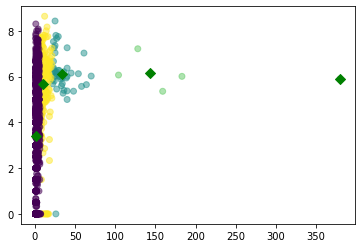

In [101]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Frequency','average'])
center_x = centers['Frequency']
center_y = centers['average']

plt.scatter(r['Frequency'],r['average'], c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='g')
plt.show()